# Example quality evaluation

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import mpstool

nx = 800
ny = 1000
ti = np.loadtxt("ti.txt").reshape((nx,ny))

plt.imshow(ti)
plt.colorbar()
plt.show()

NUM_ENSEMBLE_MEMBERS = 10

In [2]:
# Load DS realisations from a pickle
with open('simulations.pickle', 'rb') as handle:
    realisations = pickle.load(handle)

In [3]:
# Create subimages
nx_realisation = 100
ny_realisation = 200
subims = []
for i in range(NUM_ENSEMBLE_MEMBERS):
    subims.append(mpstool.stats.subimage(ti, nx_realisation, ny_realisation))

In [4]:
# Define helper functions
def append_to_dictionary(dict_of_arrays, dict_of_elements):
    for key in dict_of_arrays:
        dict_of_arrays[key].append(dict_of_elements[key])
        
def empty_dictionary_of_arrays(keys):
    dictionary = {}
    for key in keys:
        dictionary[key] = []
    return dictionary


In [5]:
# Process all the realisations and subimages

CONNECTIVITY_AXIS = 0

categories = mpstool.connectivity.get_categories(ti)

ds_proportion = empty_dictionary_of_arrays(categories)
ds_variogram = empty_dictionary_of_arrays(categories)
ds_connectivity = empty_dictionary_of_arrays(categories)

for image in realisations:
    append_to_dictionary(ds_proportion, mpstool.stats.histogram(image))
    append_to_dictionary(ds_variogram, mpstool.stats.variogram(image))
    append_to_dictionary(ds_connectivity, mpstool.connectivity.get_function(image, axis=CONNECTIVITY_AXIS))

subim_proportion = empty_dictionary_of_arrays(categories)
subim_variogram = empty_dictionary_of_arrays(categories)
subim_connectivity = empty_dictionary_of_arrays(categories)
    
for image in subims:
    append_to_dictionary(subim_proportion, mpstool.stats.histogram(image))
    append_to_dictionary(subim_variogram, mpstool.stats.variogram(image))
    append_to_dictionary(subim_connectivity, mpstool.connectivity.get_function(image, axis=CONNECTIVITY_AXIS))

In [7]:
# Process the training image

ti_proportion = mpstool.stats.histogram(ti)
ti_variogram = mpstool.stats.variogram(ti)
ti_connectivity = mpstool.connectivity.get_function(ti, axis=CONNECTIVITY_AXIS)
categories = mpstool.connectivity.get_categories(ti)

In [8]:
# Compute means

ds_proportion_mean = empty_dictionary_of_arrays(categories)
ds_variogram_mean = empty_dictionary_of_arrays(categories)
ds_connectivity_mean = empty_dictionary_of_arrays(categories)

for category in categories:
    for i in range(NUM_ENSEMBLE_MEMBERS):
        ds_proportion_mean[category].append(np.mean(ds_proportion[category][:i+1]))
        ds_variogram_mean[category].append(np.mean(ds_variogram[category][:i+1], axis=0))
        ds_connectivity_mean[category].append(np.mean(ds_connectivity[category][:i+1],axis=0))

In [9]:
subim_proportion_mean = empty_dictionary_of_arrays(categories)
subim_variogram_mean = empty_dictionary_of_arrays(categories)
subim_connectivity_mean = empty_dictionary_of_arrays(categories)

for category in categories:
    for i in range(NUM_ENSEMBLE_MEMBERS):
        subim_proportion_mean[category].append(np.mean(subim_proportion[category][:i+1]))
        subim_variogram_mean[category].append(np.mean(subim_variogram[category][:i+1], axis=0))
        subim_connectivity_mean[category].append(np.mean(subim_connectivity[category][:i+1], axis=0))

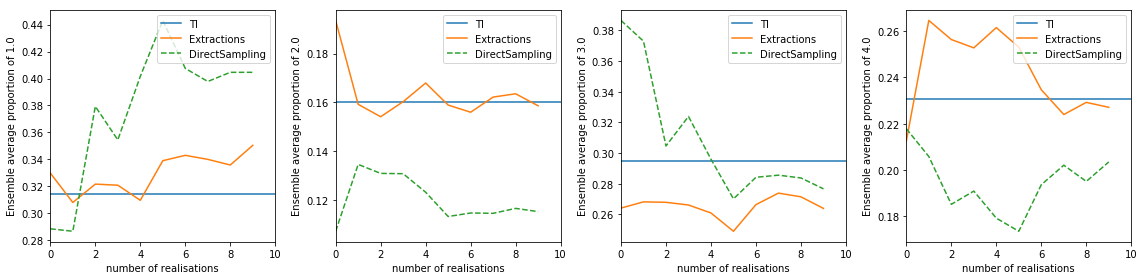

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,4))
plot_count = 0
for category in categories:
    axes[plot_count].plot(ti_proportion[category]*np.ones(NUM_ENSEMBLE_MEMBERS))
    axes[plot_count].plot(subim_proportion_mean[category])
    axes[plot_count].plot(ds_proportion_mean[category], '--')
    axes[plot_count].legend(["TI", 'Extractions', 'DirectSampling'])

    axes[plot_count].set_xlabel("number of realisations")
    axes[plot_count].set_ylabel("Ensemble average proportion of "+ str(category))
    XLIM = NUM_ENSEMBLE_MEMBERS
    axes[0].set_xlim([0, XLIM])
    axes[1].set_xlim([0, XLIM])
    axes[2].set_xlim([0, XLIM])
    axes[3].set_xlim([0, XLIM])
    plot_count += 1
fig.tight_layout()

plt.show()

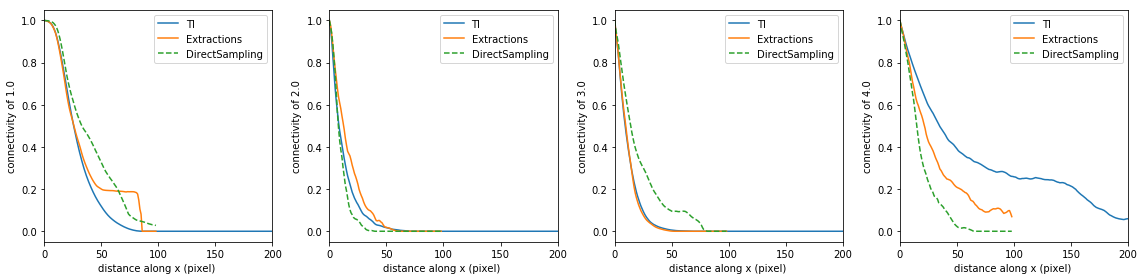

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,4))
plot_count = 0
for category in categories:
    axes[plot_count].plot(ti_connectivity[category])
    axes[plot_count].plot(subim_connectivity_mean[category][NUM_ENSEMBLE_MEMBERS-1])
    axes[plot_count].plot(ds_connectivity_mean[category][NUM_ENSEMBLE_MEMBERS-1], '--')
    axes[plot_count].legend(["TI", 'Extractions', 'DirectSampling'])
    axes[plot_count].set_xlabel("distance along x (pixel) ")
    axes[plot_count].set_ylabel("connectivity of "+ str(category))
    
    XLIM = 200
    axes[0].set_xlim([0, XLIM])
    axes[1].set_xlim([0, XLIM])
    axes[2].set_xlim([0, XLIM])
    axes[3].set_xlim([0, XLIM])
    plot_count += 1

fig.tight_layout()
plt.show()

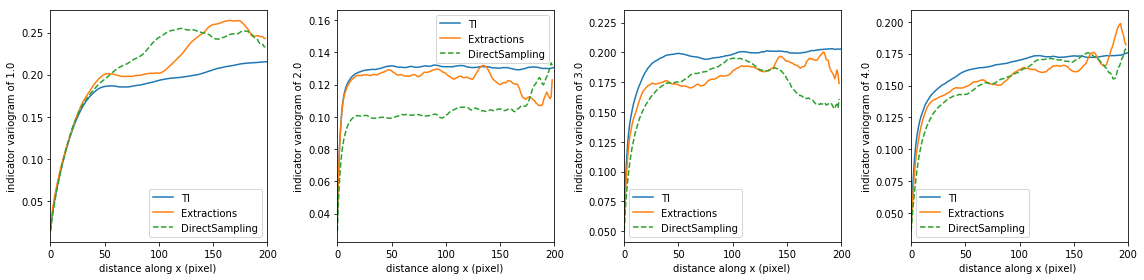

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,4))
plot_count = 0
for category in categories:
    axes[plot_count].plot(ti_variogram[category])
    axes[plot_count].plot(subim_variogram_mean[category][NUM_ENSEMBLE_MEMBERS-1])
    axes[plot_count].plot(ds_variogram_mean[category][NUM_ENSEMBLE_MEMBERS-1], '--')
    axes[plot_count].legend(["TI", 'Extractions', 'DirectSampling'])
    axes[plot_count].set_xlabel("distance along x (pixel) ")
    axes[plot_count].set_ylabel("indicator variogram of "+ str(category))
    
    XLIM = 200
    axes[0].set_xlim([0, XLIM])
    axes[1].set_xlim([0, XLIM])
    axes[2].set_xlim([0, XLIM])
    axes[3].set_xlim([0, XLIM])
    plot_count += 1

fig.tight_layout()
plt.show()